In [1]:
!pip install -q  transformers==4.28.0
!pip install -q -U accelerate
!pip install -q huggingface_hub
!pip install -q datasets
!pip install -q umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from datasets import load_dataset
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
len(train_ds)

16000

In [6]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [7]:
train_ds.column_names

['text', 'label']

In [8]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [9]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

* Dataset to DataFrame

In [10]:
import pandas as pd
emotions.set_format(type='pandas')
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
def label_int2str(row):
  return emotions["train"].features['label'].int2str(row)
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


* Visualisation

In [12]:
import matplotlib.pyplot as plt

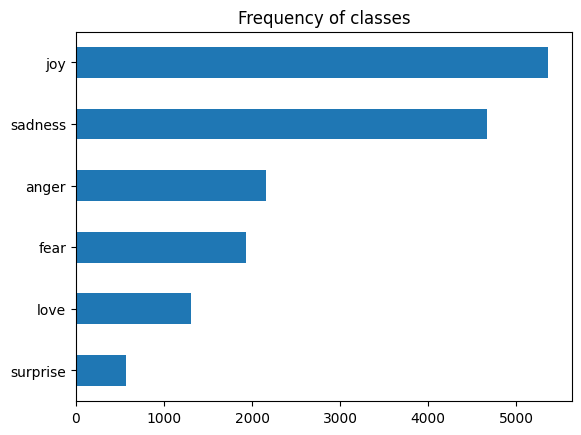

In [13]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of classes')
plt.show();

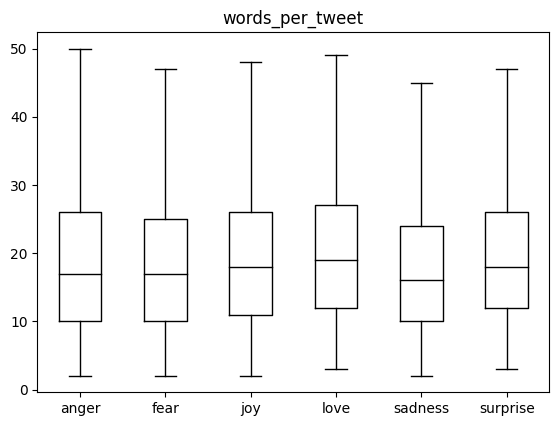

In [14]:
df['words_per_tweet'] = df['text'].str.split(" ").apply(len)
df.boxplot("words_per_tweet", by='label_name', grid=False, showfliers=False, color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [15]:
emotions.reset_format()

* Tokenization

In [16]:
from transformers import AutoTokenizer
MODEL = 'distilbert-base-uncased'
tokenizer =  AutoTokenizer.from_pretrained(MODEL)

In [17]:
text = "Tokenization is the main step of Natural Language Processing"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 3989, 2003, 1996, 2364, 3357, 1997, 3019, 2653, 6364, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [18]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##ization', 'is', 'the', 'main', 'step', 'of', 'natural', 'language', 'processing', '[SEP]']


In [19]:
#When the tokens are converted to text, [CLS] and [SEP] are removed. Token with ## means previous word is not a whitespace and should be metrged with previous word.
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenization is the main step of natural language processing [SEP]


In [20]:
tokenizer.vocab_size

30522

In [21]:
tokenizer.model_max_length

512

In [22]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [23]:
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)
encoded = tokenize(emotions['train'][:2])
print(encoded)

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [24]:
tokenizer.convert_ids_to_tokens(encoded.input_ids[0])

['[CLS]',
 'i',
 'didn',
 '##t',
 'feel',
 'humiliated',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [25]:
tokenizer.convert_ids_to_tokens(encoded.input_ids[1])

['[CLS]',
 'i',
 'can',
 'go',
 'from',
 'feeling',
 'so',
 'hopeless',
 'to',
 'so',
 'damned',
 'hopeful',
 'just',
 'from',
 'being',
 'around',
 'someone',
 'who',
 'cares',
 'and',
 'is',
 'awake',
 '[SEP]']

In [26]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded['train'].column_names)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


* Transformers as feature extractors

In [27]:
import torch
from transformers import AutoModel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(MODEL).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
text = "Tokenization is the main step of Natural Language Processing"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape {inputs.input_ids.size()}")

Input tensor shape torch.Size([1, 12])


In [29]:
inputs.input_ids

tensor([[  101, 19204,  3989,  2003,  1996,  2364,  3357,  1997,  3019,  2653,
          6364,   102]])

In [30]:
tokenizer.convert_ids_to_tokens(inputs.input_ids[0])

['[CLS]',
 'token',
 '##ization',
 'is',
 'the',
 'main',
 'step',
 'of',
 'natural',
 'language',
 'processing',
 '[SEP]']

In [31]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.4521, -0.1588, -0.3575,  ..., -0.2528, -0.3941,  0.6216],
         [-0.6429,  0.2274, -0.6885,  ..., -0.3926, -0.2992,  0.3543],
         [-0.5548,  0.2067, -0.6152,  ..., -0.5454, -0.4892,  0.4866],
         ...,
         [-0.4324,  0.2672, -0.0319,  ..., -0.4298, -0.5862,  0.3995],
         [-0.0674, -0.1496, -0.4238,  ..., -0.4397, -0.6615, -0.0606],
         [ 0.8339,  0.0869, -0.6038,  ...,  0.1343, -0.8751, -0.1862]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [32]:
outputs.last_hidden_state.size()

torch.Size([1, 12, 768])

In [33]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_states = model(**inputs).last_hidden_state
  return {"hidden_state":last_hidden_states[:, 0].cpu().numpy()}

In [34]:
emotions_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden['train'].column_names

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [35]:
#Feature Matrix
import numpy as np
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_val = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_val = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_val.shape

((16000, 768), (2000, 768))

* Visualisation Training Set

In [36]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(X_train)
#Initialise and fit umap
mapper = UMAP(n_components=2, metric='cosine').fit(x_scaled)
#Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.765883,6.854582,0
1,-2.709723,6.102245,0
2,5.545652,3.343362,3
3,-1.972802,4.181264,2
4,-2.896281,4.164329,3


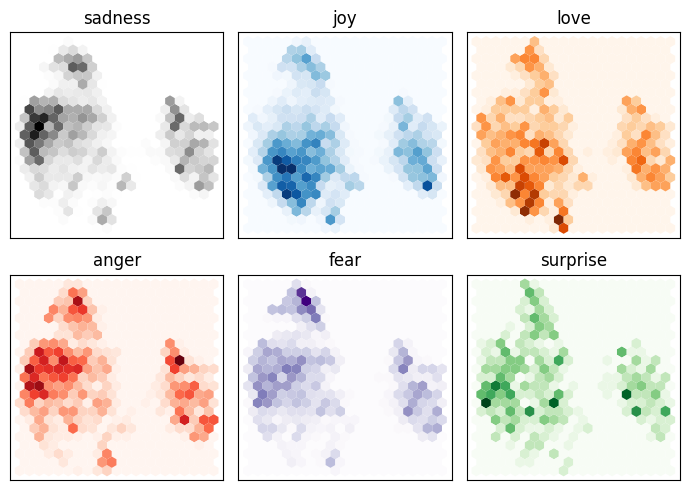

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label=={i}")
  axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

* Fine-tuning a transformer

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_preds, y_true, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalised confusion matrix")
  plt.show()

In [39]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1":f1}

In [40]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(MODEL, num_labels=num_labels).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

In [41]:
from transformers import Trainer, TrainingArguments
batch_size=64
logging_steps = len(emotions_encoded["train"])//batch_size
model_name=f"{MODEL}-finetuned-emotions-dataset"
training_args = TrainingArguments(output_dir=model_name, num_train_epochs=2, learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [42]:
from huggingface_hub import notebook_login
notebook_login()

In [44]:
from transformers import Trainer
trainer = Trainer(model = model, args=training_args, compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Cloning https://huggingface.co/dasaprakashk/distilbert-base-uncased-finetuned-emotions-dataset into local empty directory.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.853100,0.310985,0.913500,0.911915
2,0.246800,0.214226,0.924500,0.924619


In [45]:
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.21422646939754486,
 'test_accuracy': 0.9245,
 'test_f1': 0.9246185441207682,
 'test_runtime': 4.3358,
 'test_samples_per_second': 461.279,
 'test_steps_per_second': 7.38}

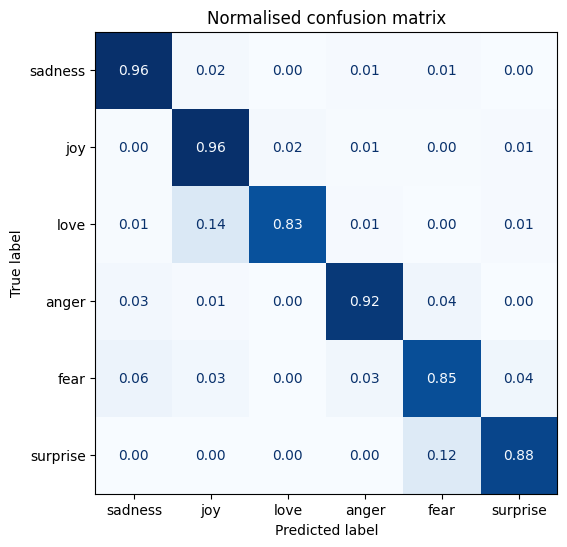

In [47]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_val, labels)

* Error Analysis

In [48]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=1)
    loss = cross_entropy(output.logits, batch['label'].to(device), reduction="none")
  return {"loss":loss.cpu().numpy(), "predicted_label":pred_label.cpu().numpy()}

In [49]:
emotions_encoded.set_format("torch", columns = ["input_ids", "attention_mask", "label"])
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [50]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)

In [51]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.517963
1963,i called myself pro life and voted for perry w...,joy,sadness,5.075810
882,i feel badly about reneging on my commitment t...,love,sadness,5.016566
1509,i guess this is a memoir so it feels like that...,joy,fear,5.015493
1111,im lazy my characters fall into categories of ...,joy,fear,4.919390
1274,i am going to several holiday parties and i ca...,joy,sadness,4.897413
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.869582
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.637725
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.614757
1801,i feel that he was being overshadowed by the s...,love,sadness,4.535306


In [52]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
69,i have no extra money im worried all of the ti...,sadness,sadness,0.015850
866,i feel quite jaded and unenthusiastic about li...,sadness,sadness,0.016241
1965,i started feeling pathetic and ashamed,sadness,sadness,0.016254
861,i am feeling awfully lonely today and i dont w...,sadness,sadness,0.016255
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.016430
1656,im feeling very jaded and uncertain about love...,sadness,sadness,0.016444
34,i feel that i m so pathetic and downright dumb...,sadness,sadness,0.016453
697,i was missing him desperately and feeling idio...,sadness,sadness,0.016472
1303,i feel pathetic and uninspired,sadness,sadness,0.016472
1152,i feel pathetic because i shouldn t complain a...,sadness,sadness,0.016485


In [53]:
trainer.push_to_hub(commit_message="Trained Model!")

Upload file runs/Sep03_15-51-00_3c8325cf5c99/events.out.tfevents.1693756447.3c8325cf5c99.639.0: 100%|#########…

To https://huggingface.co/dasaprakashk/distilbert-base-uncased-finetuned-emotions-dataset
   85d26c3..4a0ee3c  main -> main

   85d26c3..4a0ee3c  main -> main

To https://huggingface.co/dasaprakashk/distilbert-base-uncased-finetuned-emotions-dataset
   4a0ee3c..27ebe16  main -> main

   4a0ee3c..27ebe16  main -> main



'https://huggingface.co/dasaprakashk/distilbert-base-uncased-finetuned-emotions-dataset/commit/4a0ee3cf04f04f7463f45662dfbb21291bdb6485'

In [55]:
from transformers import pipeline
model_id = "dasaprakashk/distilbert-base-uncased-finetuned-emotions-dataset"
classifier = pipeline("text-classification", model=model_id)

In [56]:
tweet = "I saw Equalizer 3 today and it was really good!!"
preds = classifier(tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


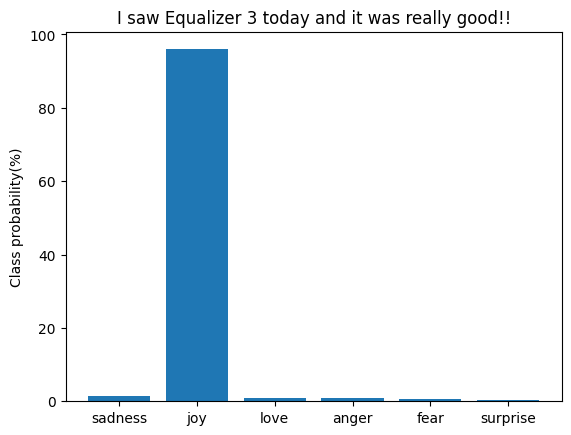

In [58]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df["score"], color="C0")
plt.title(f"{tweet}")
plt.ylabel("Class probability(%)")
plt.show()